1.1

Моделирование дискретизации и квантования синусоидального сигнала x(t)=sin(2πf0t)
 с частотой дискретизации fs
.

Наблюдение эффектов во временной области для отрезка сигнала из N
 отсчетов.



In [ ]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile

In [ ]:
def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):
    """Uniform quantization approach
    Равномерное квантование сигнала

    Args:
        x: Оригинальный сигнал
        quant_min: Минимальный уровень квантования
        quant_max: Максимальный уровень квантования
        quant_level: Количество уровней квантования

    Returns:
        x_quant: Квантованный сигнал
    """
    # Нормализация сигнала x в диапазоне от quant_min до quant_max
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)

    x_normalize[x_normalize > quant_level - 1] = quant_level - 1

    x_normalize[x_normalize < 0] = 0

    # Округление нормализованного сигнала x_normalize до ближайшего целого числа
    x_normalize_quant = np.around(x_normalize)

    # Восстановление квантованного сигнала x_quant в исходном диапазоне с использованием формулы обратной нормализации
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min

    return x_quant

Пример для дискретизации

In [ ]:
N=20                                    # Число отсчетов по времени
f0=250.0                                # Частота синусоиды в Гц
fs=1250.0                               # Частота дискретизации в Гц
k=np.arange(N)                          # Mассив времен k от 0 до N-1 с шагом 1
x=np.sin(2*np.pi*(f0/fs)*k)             # Последовательность x[k]
num_levels=16                      # число уровней квантования

<ipython-input-6-18cf76020909>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k/fs, y, linefmt='b', markerfmt='bo', use_line_collection=True, label='цифровой сигнал $y[k]$')


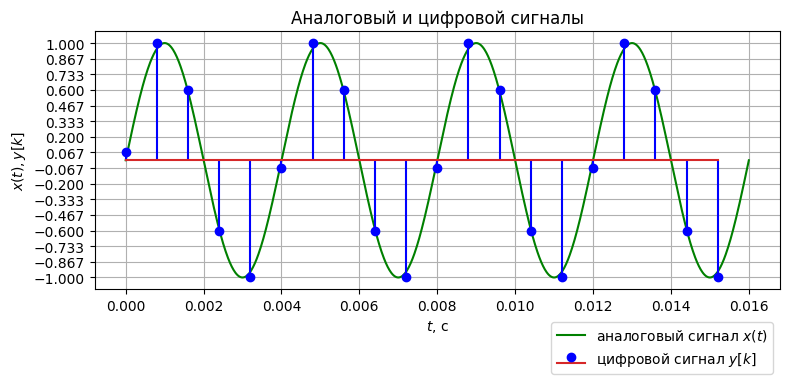

In [ ]:
# моделирование квантования дискретного сигнала
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)
# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[8, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, linefmt='b', markerfmt='bo', use_line_collection=True, label='цифровой сигнал $y[k]$')
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м

if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()

Пример для квантования (цифровой сигнал)


In [ ]:
# моделирование квантования дискретного сигнала
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)

<ipython-input-15-717107d4558c>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k/fs, y, linefmt='b', markerfmt='bo', use_line_collection=True, label='цифровой сигнал $y[k]$')


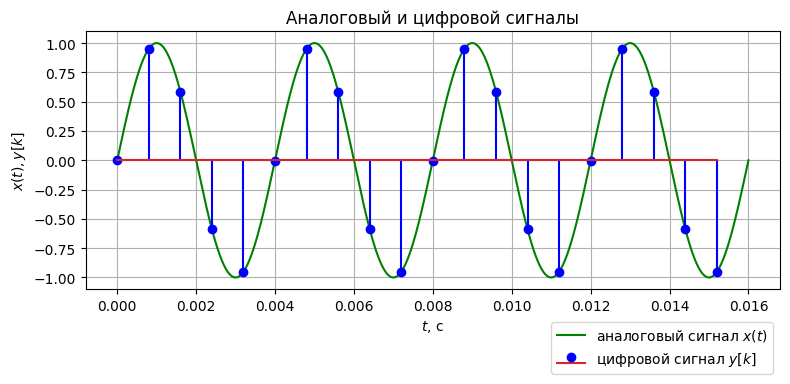

In [ ]:
# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[8, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, linefmt='b', markerfmt='bo', use_line_collection=True, label='цифровой сигнал $y[k]$')
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м

if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()                          # автоматическая корректировка расположения осей графика

Ошибка квантования

In [ ]:
abs(x-y)

array([0.00392157, 0.00188466, 0.00347153, 0.00347153, 0.00188466,
       0.00392157, 0.00188466, 0.00347153, 0.00347153, 0.00188466,
       0.00392157, 0.00188466, 0.00347153, 0.00347153, 0.00188466,
       0.00392157, 0.00188466, 0.00347153, 0.00347153, 0.00188466])

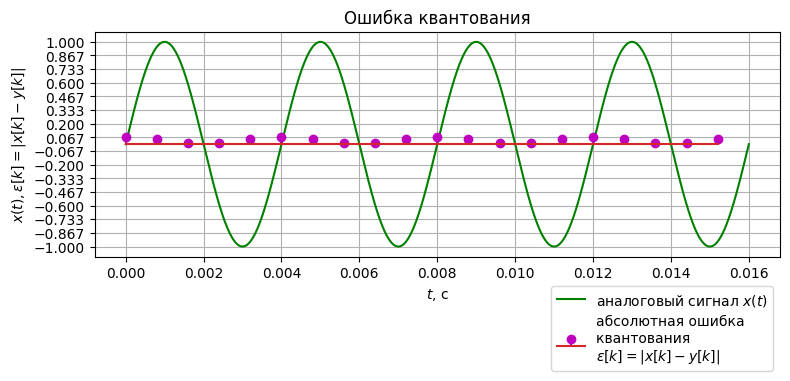

In [ ]:
plt.figure(figsize=[8, 4])
plt.title("Ошибка квантования")
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), linefmt='m', markerfmt='mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()
plt.show()

Ответы на вопросы 1.1:

1. Как соотносится растояние между отсчетами по оси времени с частотой дискретизации?

- Расстояние между двумя последовательными отсчётами - это Интервал дискретизации (или шаг дискретизации).
Он измеряется в секундах.

- Частота дискретизации определяется через количество отсчетов, сделанных за единицу времени. Она измеряется в Гц, показывает сколько раз за секунду производится отсчет.

    Растояние между отсчетами = 1 / Частота дискретизации

2. Как изменяется максимально возможная абсолютная ошибка квантования ε[k]=|x[k]−y[k]|
 с ростом числа уровней квантования?

   Число уровней квантования обычно определяется количеством дискретных значений, на которые разбивается диапазон возможных значений аналогового сигнала. Чем выше число уровней квантования, тем более точное и детализированное представление сигнала можно получить после квантования.

   Логично сказать, что с ростом числа уровней квантования максимально возможная абсолютная ошибка уменьшается. Это демонстрируется на нашем графике, если рассмотреть его для двух разных значений числа уровней квантования - 8 и 16, например.

In [ ]:
#NEXT TASK

1.2

Декодирование .wav файла flute.wav


In [ ]:
from IPython.display import Audio
Audio('drive/MyDrive/lab1/flute.wav')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fs, x = scipy.io.wavfile.read('drive/MyDrive/lab1/flute.wav') # чтение аудиофайла

- Определение частоты дискретизации, битной глубины записи (соотвествует dtype) и соотвествующего ей количества уровней квантования.

In [ ]:
fs

48000

In [ ]:
x

array([-281088, -316928, -335616, ...,  408576,  431360,  430336],
      dtype=int32)

In [ ]:
x.dtype

dtype('int32')

In [ ]:
x.size

528000

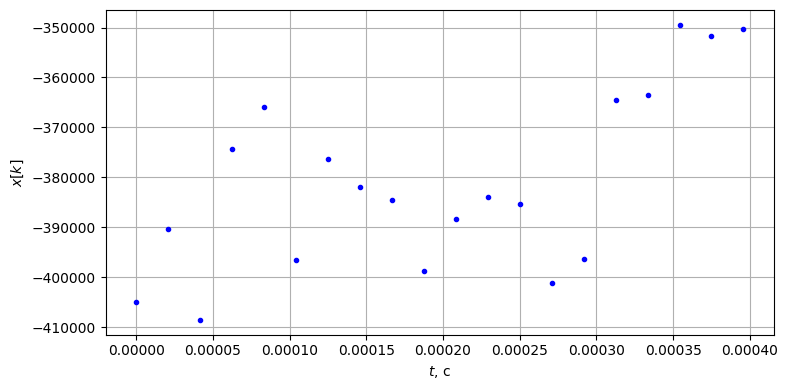

In [ ]:
x1=x[80:100]                     # выбор наблюдаемого диапазона
k=np.arange(x1.size)               # отсчеты по времени
# Построение графиков
plt.figure(figsize=[8, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.plot(k/fs, x1, 'b.')           # построение графика цифрового сигнала точками точками
plt.grid()
plt.xlabel("$t$, c")
plt.ylabel("$x[k]$")
plt.tight_layout()

- Сравнение растояния между отсчётами по оси времени на графике с частотой дискретизации.

  Как видно на графике расстояние между отсчётами при грубой оценке равно примерно 0.00005 * 1/2 c => частота дискретизации примерно 40 кГц, что, так сказать, в пределах погрешности совпадает с выведенным выше значением в 48 кГц. Для точного расчёта есть мнение, что частота будет очень близка к 48 кГц

In [ ]:
#next point
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

- Изменение оси времени (первого аргумента функции plt.plot) так, чтобы первому отсчету наблюдаемого диапазона соответствовало время от начала файла.
Непонятно что нужно изменить - ведь в примере и так уже от нуля стартуется.

In [ ]:
#next point

- Определение длины записи в секундах.

In [ ]:
duration = len(x) / fs
print("Длительность записи:", duration, "секунд")

Длительность записи: 11.0 секунд


- Оценка объема файла в килобайтах (КБ), при условии, что никакое дополнительное сжатие не производится (используя данные о частоте дискретизации, числе отсчетов и битовой глубине). Сравнение с реальным объемом файла.


 x.dtype.itemsize представляет размер каждого элемента в массиве x, а * 8 используется для преобразования размера в биты.

In [ ]:
bit_depth = x.dtype.itemsize * 8  # битовая глубина (размер типа элемента массива x)
num_samples = len(x)  # число отсчетов
file_size_kb = (bit_depth * num_samples) / (8 * 1024)  # объем файла в килобайтах

print(file_size_kb)

# c реальным обьемом в 2мб совпадает

2062.5


2 Спектры импульсных и периодических сигналов.


In [ ]:
import scipy.integrate as integrate # импорт модуля численного интегрирования
def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла
def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

2.1 Спектры симметричных оконных функций

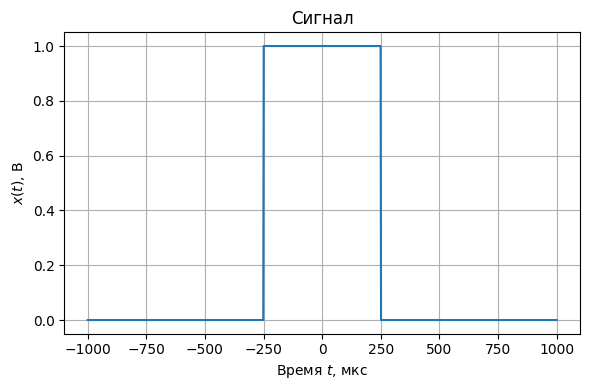

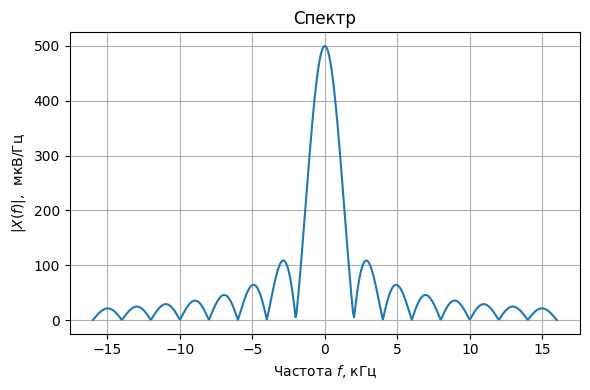

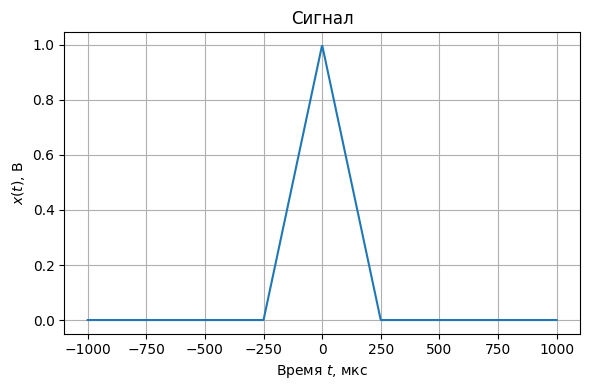

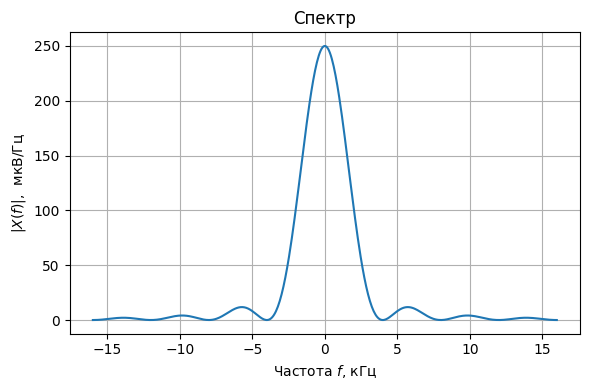

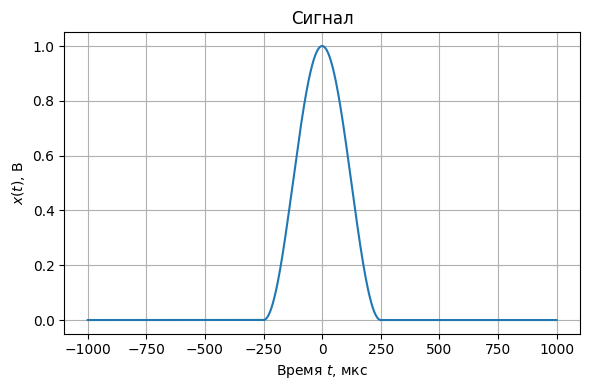

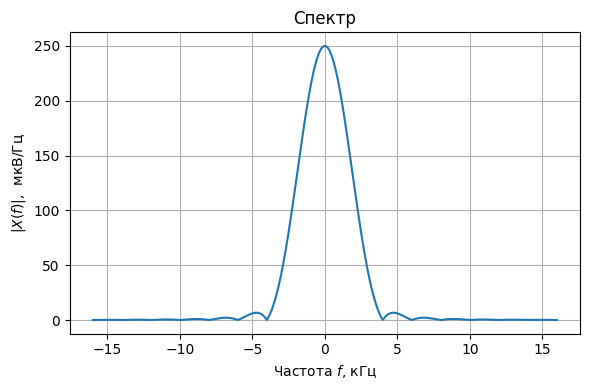

In [ ]:
tau = 500e-6  # 500 мкс

f_band = np.linspace(-8/tau, 8/tau, 500)  # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t) < tau/2:
        return 1.0
    else:
        return 0.0

def triangle(t, tau):
    if abs(t) < tau/2:
        return 1 - abs(t) / (tau/2)
    else:
        return 0.0

def Hann(t, tau):
    if abs(t) < tau/2:
        return 0.5 * (1 + np.cos(2 * np.pi * t / tau))
    else:
        return 0.0

def draw(signal_func, tau):
    t_band = np.linspace(-2*tau, 2*tau, 1024)
    plt.figure(figsize=[6, 4])
    plt.plot(t_band*1e6, [signal_func(t, tau) for t in t_band])
    plt.xlabel("Время $t$, мкс")
    plt.ylabel("$x(t)$, В")
    plt.title("Сигнал")
    plt.tight_layout()
    plt.grid()

    plt.figure(figsize=[6, 4])
    plt.plot(f_band/1e3, fourier_transform(signal=signal_func, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
    plt.xlabel("Частота $f$, кГц")
    plt.ylabel("$|X(f)|$,  мкВ/Гц")
    plt.title("Спектр")
    plt.tight_layout()
    plt.grid()

draw(boxcar, tau)
draw(triangle, tau)
draw(Hann, tau)

| Окно | Уровень бокового лепестка относительно главного, дБ | Ширина главного лепестка |
| --- | --- | --- |
| Прямоугольное | -13 | 4000 |
| Треугольное | -28 | 8000 |
| Ханна | -34 | 8000 |

X(f) = sinc(πτf) - прямоугольное окно

2.2. Теорема запаздывания для преобразования Фурье

NameError: ignored

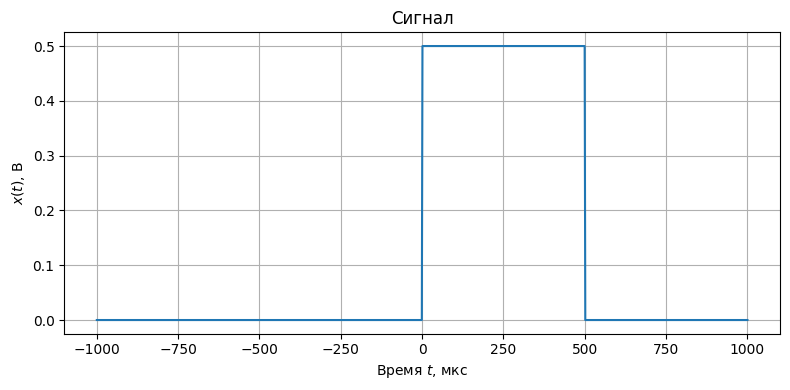

<Figure size 800x400 with 0 Axes>

In [ ]:
tau=500*1e-6 #500 мкс

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0<t<tau:
        return 0.5 # 0.1 В
    else:
        return 0.0 # 0 В

def boxcar2(t, tau):
    if -tau<t<0:
        return 0.5 # 0.1 В
    else:
        return 0.0 # 0 В

def draw(signal, tau):
  t_band=np.linspace(-2*tau, 2*tau, 1024)
  plt.figure(figsize=[8, 4])
  plt.plot(t_band*1e6, [signal(t, tau) for t in t_band])
  plt.xlabel("Время $t$, мкс")
  plt.ylabel("$x(t)$, В")
  plt.title("Сигнал")
  plt.tight_layout()
  plt.grid()

  plt.figure(figsize=[8, 4])
  plt.plot(f_band/1e3, fourier_transform(signal=signal, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
  plt.plot(f_band/1e3, fourier_transform(signal=signal, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
  plt.plot(f_band/1e3, fourier_transform(signal=signal, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
  plt.xlabel("Частота $f$, кГц")
  plt.ylabel("$|X(f)|$,  мкВ / Гц")
  plt.title("Спектр")
  plt.legend(loc='best', bbox_to_anchor=(1, 1))
  plt.tight_layout()
  plt.grid()

draw(boxcar, tau)
draw(boxcar2, tau)


2.3. Спектр отрезка синусоиды

NameError: ignored

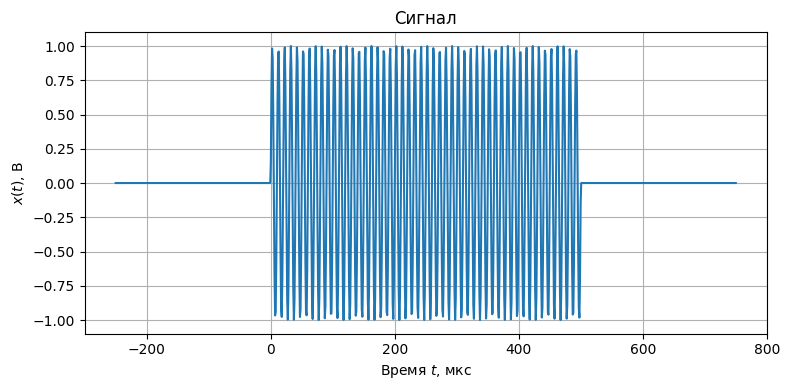

<Figure size 800x400 with 0 Axes>

In [ ]:
f0=100*1e3       # 100 кГц
tau=50*1e-6    # 50 мкс

def sin_with_boxcar(t, tau):
    if 0<=t<=tau:
        # случай прямоугольного окна
        return np.sin(2*np.pi*f0*t)
        # случай окна Ханна
        # return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0

f_band=np.linspace(-2*f0, 2*f0, 2000)

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()
plt.grid()

Сравним положение главных спектральных максимумов с частотой синусоиды.

- Гл макс имеет частоту 100 кГц
- Частота синусоиды 1/10 * 10^6 Гц = 100 кГц

Величины совпадают

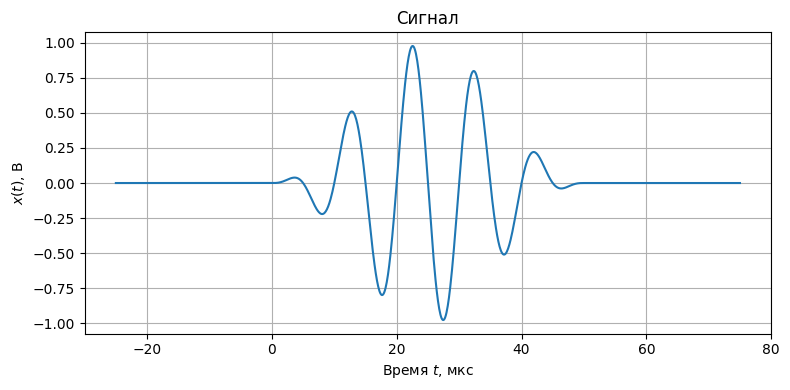

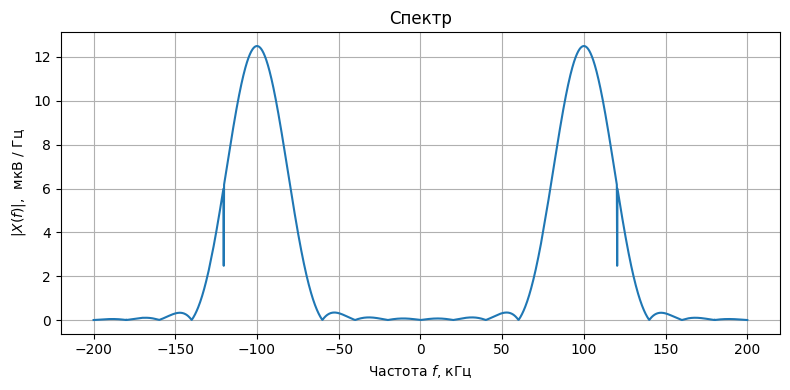

In [ ]:
f0=100*1e3       # 100 кГц
tau=50*1e-6    # 50 мкс

def sin_with_boxcar(t, tau):
    if 0<=t<=tau:
        # случай прямоугольного окна
        # return np.sin(2*np.pi*f0*t)
        # случай окна Ханна
         return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0

f_band=np.linspace(-2*f0, 2*f0, 2000)

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()
plt.grid()

Сравним положение главных спектральных максимумов с частотой синусоиды.

- Гл макс имеет частоту 100 кГц
- Частота синусоиды 1/10 * 10^6 Гц = 100 кГц ???

Величины совпадают???

Задача 2.4. Спектр пачки равноотстоящих импульсов

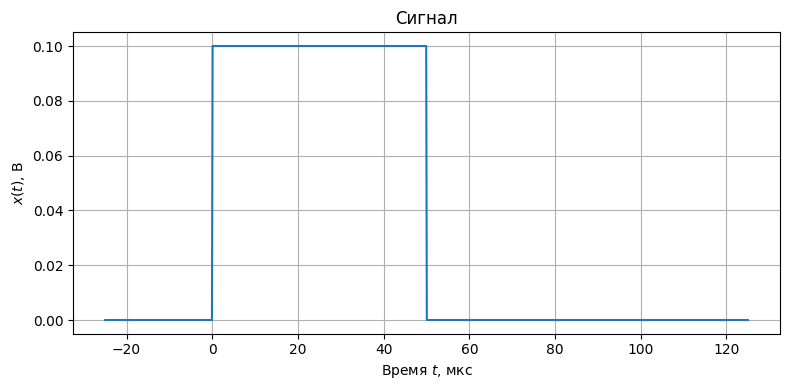

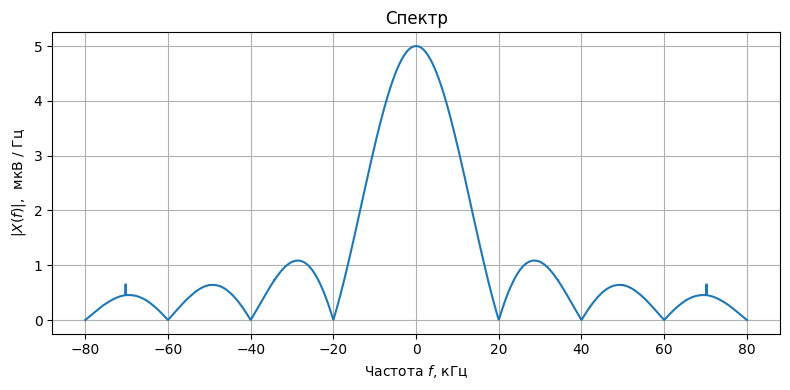

In [ ]:
N=1
tau=50e-6 #50 мкс
period = 125e-6

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):

    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В

t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()
plt.grid()

<ipython-input-9-18010c2de1e9>:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-9-18010c2de1e9>:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


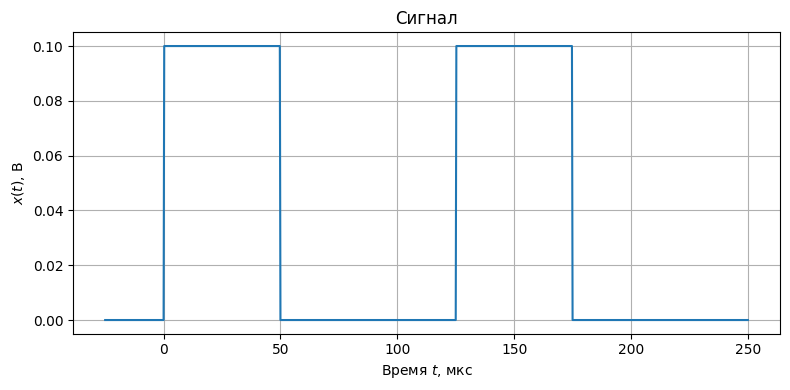

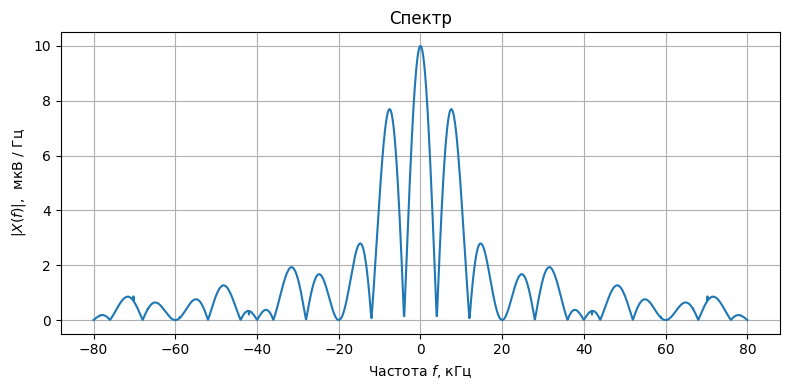

In [ ]:
N=2
tau=50e-6 #50 мкс
period = 125e-6

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):

    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В

t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()
plt.grid()

<ipython-input-9-18010c2de1e9>:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-9-18010c2de1e9>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-9-18010c2de1e9>:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(si

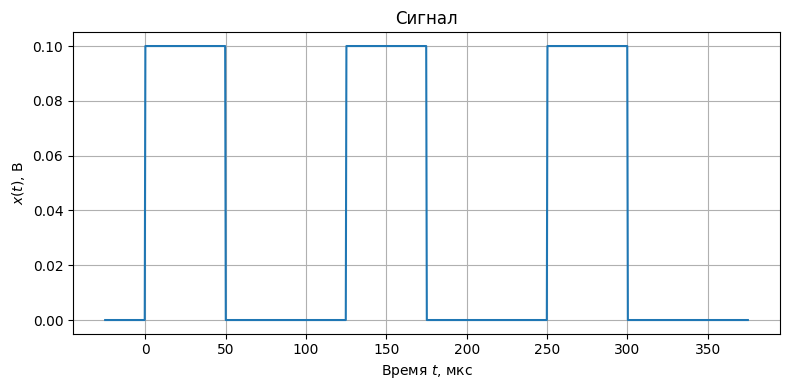

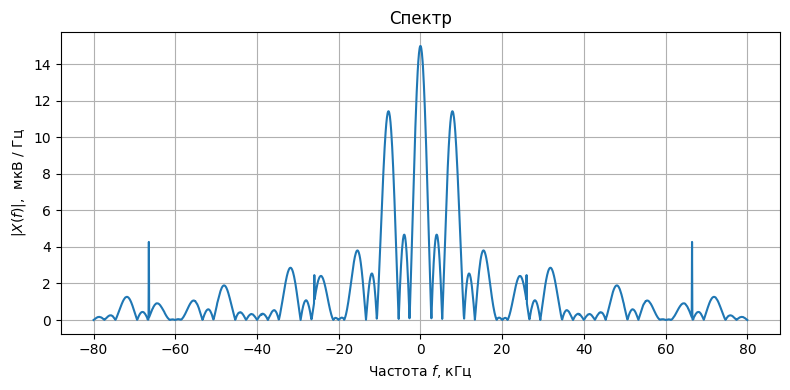

In [ ]:
N=3
tau=50e-6 #50 мкс
period = 125e-6

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):

    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В

t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()
plt.grid()

<ipython-input-9-18010c2de1e9>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-9-18010c2de1e9>:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-9-18010c2de1e9>:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to 

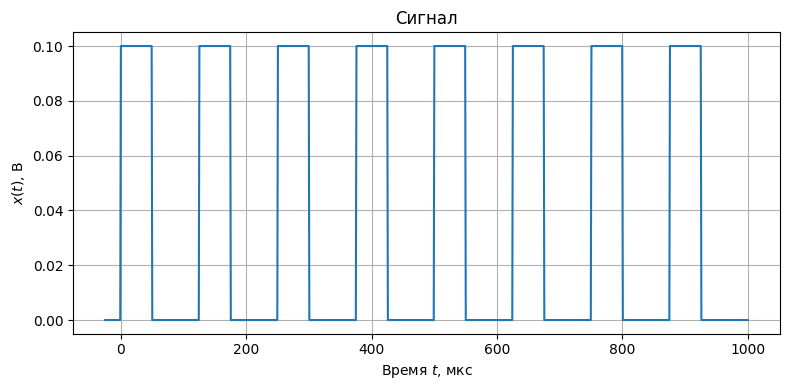

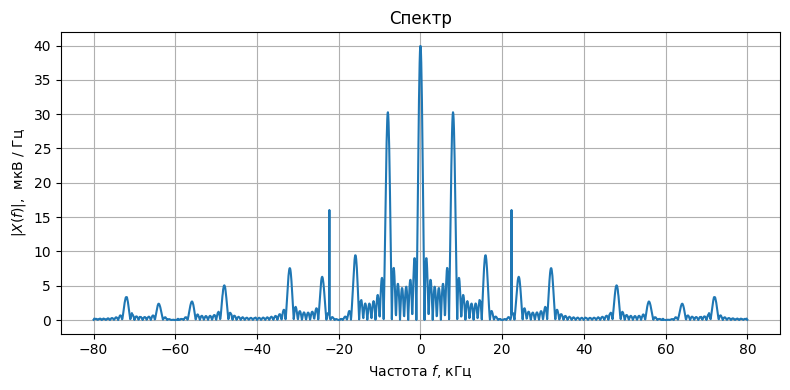

In [ ]:
N=8
tau=50e-6 #50 мкс
period = 125e-6

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):

    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В

t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()
plt.grid()

<ipython-input-9-18010c2de1e9>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-9-18010c2de1e9>:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-9-18010c2de1e9>:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to 

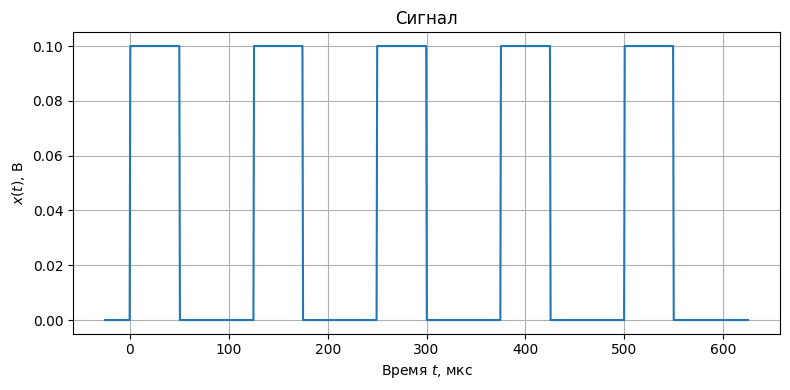

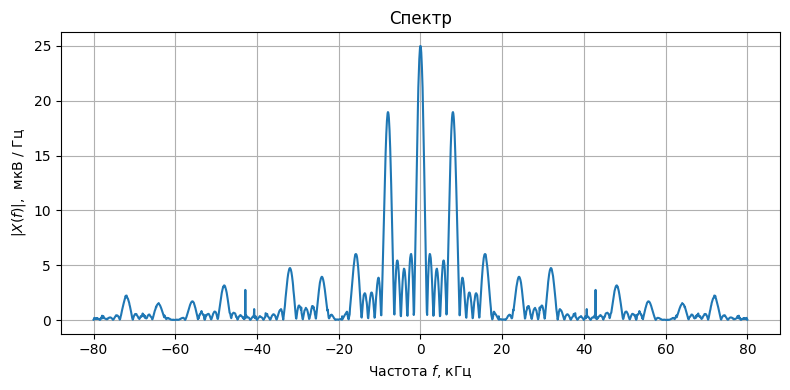

In [ ]:
N=5
tau=50e-6 #50 мкс
period = 125e-6

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):

    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В

t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()
plt.grid()

прилумать и доказать гипотезу о связи количества импулсом=в в сигнае и спектра.

3. Эффект наложения спектров при дискретизации сигналов.

Задача 3.1. Эффект наложения при дискретизации прямоугольного импульса

In [ ]:
def DTFT_abs3(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-1.5, 1.5, 1/M), np.hstack((res, res, res))

<ipython-input-55-18010c2de1e9>:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


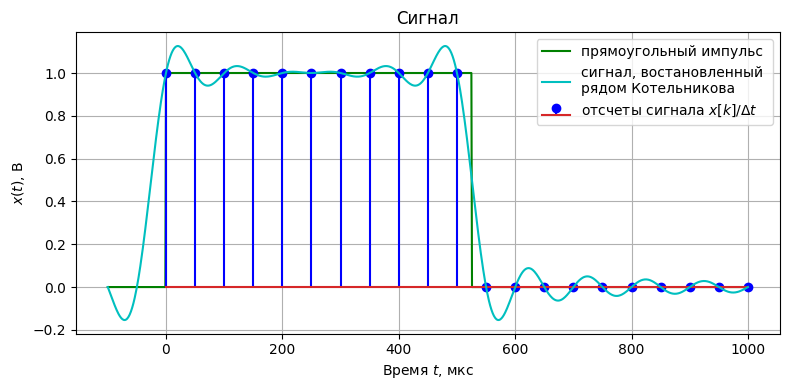

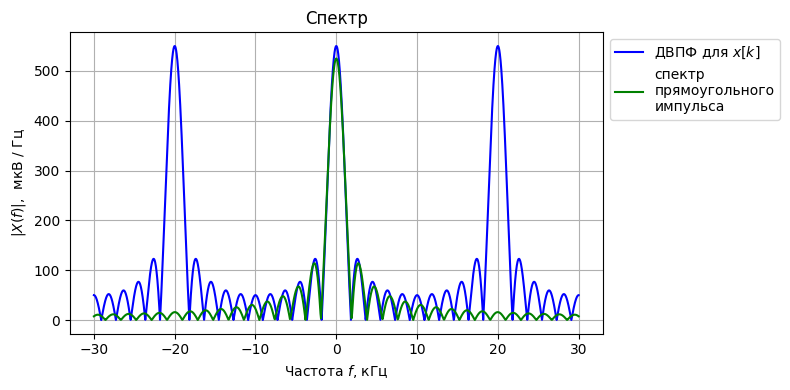

In [ ]:
tau=500*1e-6 #500 мкс
fs=10/tau

f_band=np.linspace(-1.5*fs, 1.5*fs, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0 <= t <= 1.05*tau:
        return 1.0
    elif np.isclose(t, 1.05*tau, atol=1e-12) or np.isclose(t, 0, atol=1e-12):
        return 1.0
    else:
        return 0.0

def sinc_phi(t, k, fs):
    dt=1/fs
    if np.isclose(0, t-k*dt):
        return 1.0
    else:
        return np.sin(np.pi*fs*(t-k*dt))/(np.pi*fs*(t-k*dt))

def sinc_interp(t, xk):
    return sum([xk[k]*fs*sinc_phi(t, k, fs) for k in range(len(xk))])

tk = np.arange(0, 2*tau+1.0/fs, 1.0/fs, dtype=float)
xk = np.array([(1/fs)*boxcar(tk1, tau) for tk1 in tk])

t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band], 'g', label='прямоугольный импульс')
plt.stem(tk*1e6, xk*fs, linefmt='b', markerfmt='bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')



plt.plot(t_band*1e6, np.array([sinc_interp(t, xk) for t in t_band]), 'c', label='сигнал, востановленный \nрядом Котельникова')

plt.title("Сигнал")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.figure(figsize=[8, 4])


DFTF_plot=DTFT_abs3(xk, fs)
plt.plot(DFTF_plot[0]/1e3, DFTF_plot[1]*1e6, 'b', label='ДВПФ для $x[k]$')

plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6,
         'g', label='спектр\nпрямоугольного\nимпульса')

plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()

3.2. Эффект наложения при прореживании сигнала

In [ ]:
def DTFT_abs(xk, fs, M=2**17):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-0.5, 0.5, 1/M), np.hstack((res))

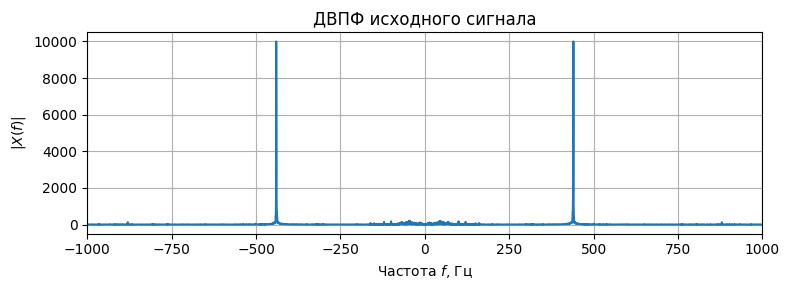

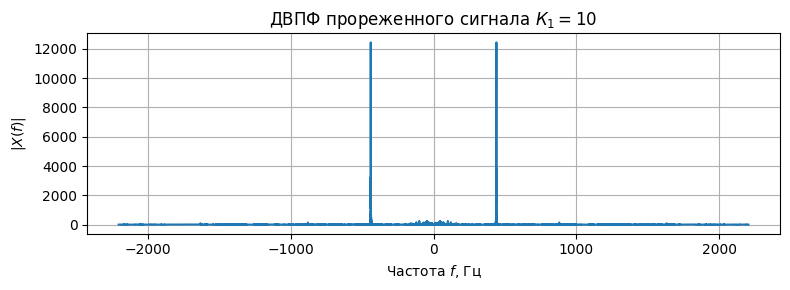

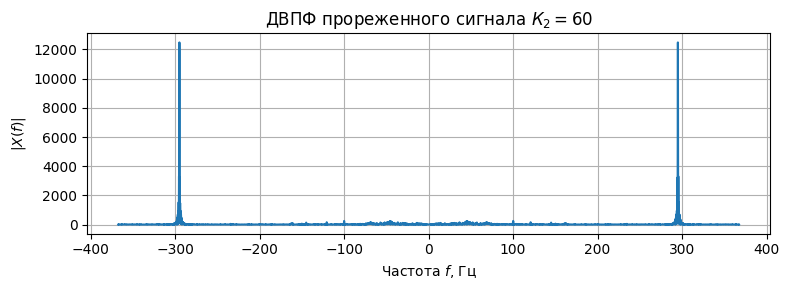

In [ ]:
fs, x=scipy.io.wavfile.read('drive/MyDrive/lab1/tuning-fork.wav')
#for mono channel
#x=x[:,1]

plt.figure(figsize=[8, 3], dpi=100)

DFTF_plot=DTFT_abs(x/fs, fs)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ исходного сигнала")
plt.xlim([-1000, 1000])
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout()

# downsampling
plt.figure(figsize=[8, 3], dpi=100)
K1=10
y=x[::K1]
DFTF_plot=DTFT_abs(y/(fs/K1), fs/K1)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K1)
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout()

# downsampling
plt.figure(figsize=[8, 3], dpi=100)
K2=60
y=x[::K2]

DFTF_plot=DTFT_abs(y/(fs/K2), fs/K2)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_2=$%i" %K2)
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-9-18010c2de1e9>:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-9-18010c2de1e9>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
<ipython-input-9-18010c2de1e9>:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to 

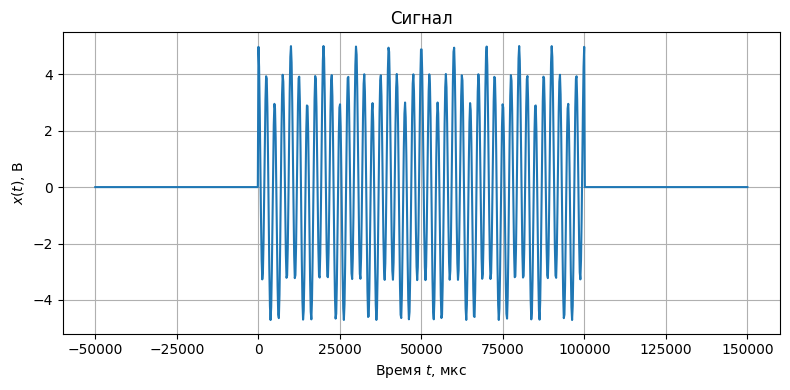

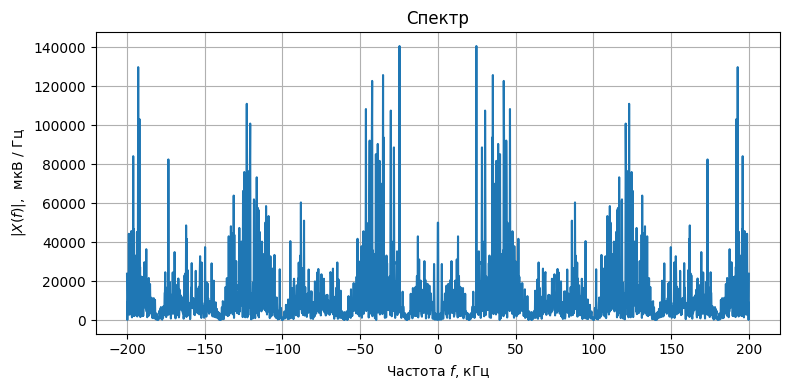

In [ ]:
f0=100*1e3       # 100 кГц
tau=0.1    # 50 мкс
f1 = 100
f2 = 400
def sin_with_boxcar(t, tau):
    if 0<=t<=tau:
        # случай прямоугольного окна
        return np.cos(2*np.pi*f1*t) + 4 * np.cos(2*np.pi * f2 * t)
        # случай окна Ханна
        # return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0

f_band=np.linspace(-2*f0, 2*f0, 2000)

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout()
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout()
plt.grid()